# **Import libraries and load dataset**

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

df=pd.read_csv("/kaggle/input/top-1000-wealthiest-people-in-the-world/Top_1000_wealthiest_people.csv")
print(df.info())
print(df.isnull().sum())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Name                     1000 non-null   object 
 1   Country                  1000 non-null   object 
 2   Industry                 1000 non-null   object 
 3   Net Worth (in billions)  1000 non-null   float64
 4   Company                  1000 non-null   object 
dtypes: float64(1), object(4)
memory usage: 39.2+ KB
None
Name                       0
Country                    0
Industry                   0
Net Worth (in billions)    0
Company                    0
dtype: int64
       Net Worth (in billions)
count              1000.000000
mean                102.616270
std                  56.796062
min                   1.570000
25%                  54.960000
50%                 103.365000
75%                 151.912500
max                 199.240000


# **EDA**

In [2]:
percentiles = df['Net Worth (in billions)'].quantile([0.1, 0.25, 0.5, 0.75, 0.9])
print(percentiles)


0.10     25.0010
0.25     54.9600
0.50    103.3650
0.75    151.9125
0.90    182.4460
Name: Net Worth (in billions), dtype: float64


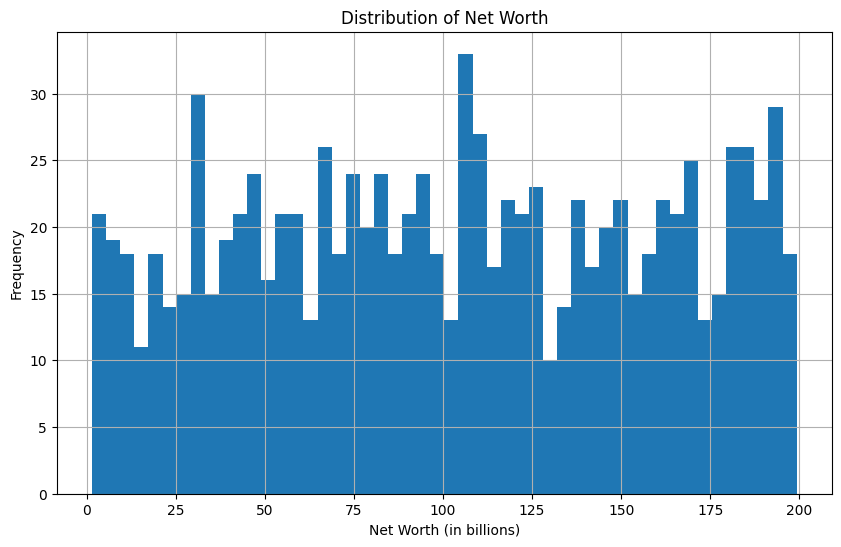

In [3]:
plt.figure(figsize=(10, 6))
df['Net Worth (in billions)'].hist(bins=50)
plt.xlabel('Net Worth (in billions)')
plt.ylabel('Frequency')
plt.title('Distribution of Net Worth')
plt.show()


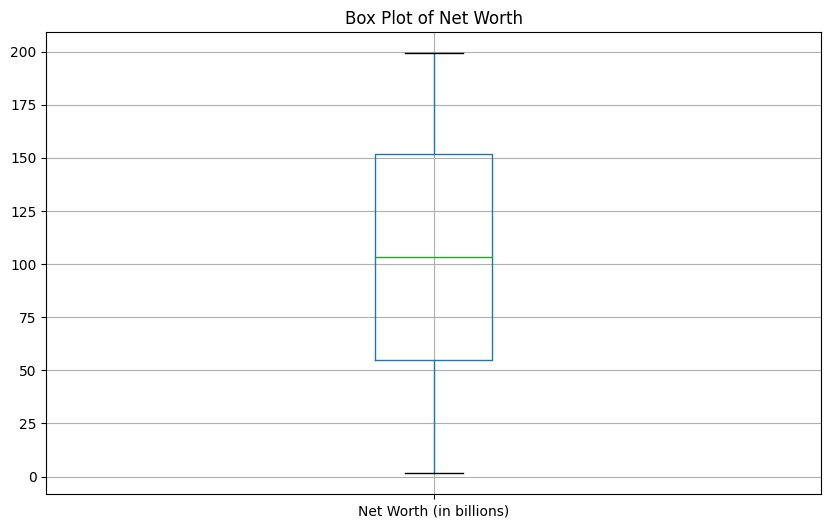

In [4]:
plt.figure(figsize=(10, 6))
df.boxplot(column='Net Worth (in billions)')
plt.title('Box Plot of Net Worth')
plt.show()


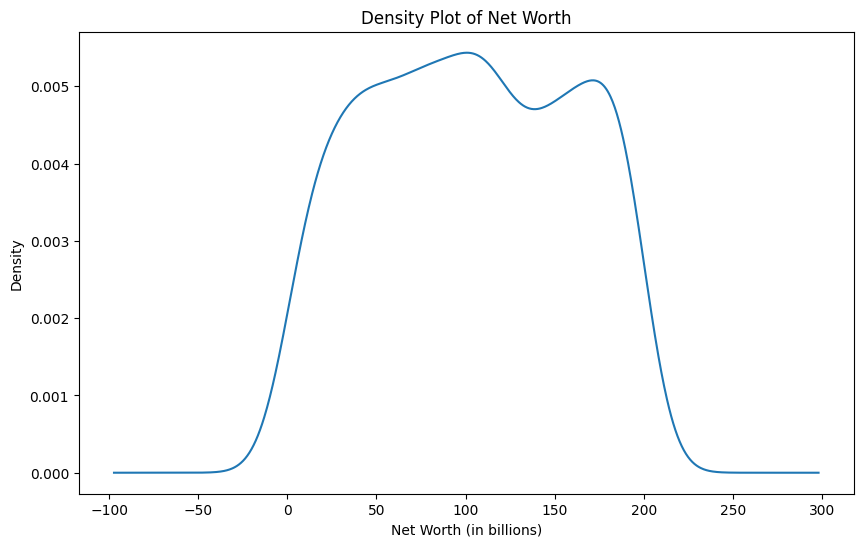

In [5]:
df['Net Worth (in billions)'].plot(kind='kde', figsize=(10, 6), title='Density Plot of Net Worth')
plt.xlabel('Net Worth (in billions)')
plt.show()


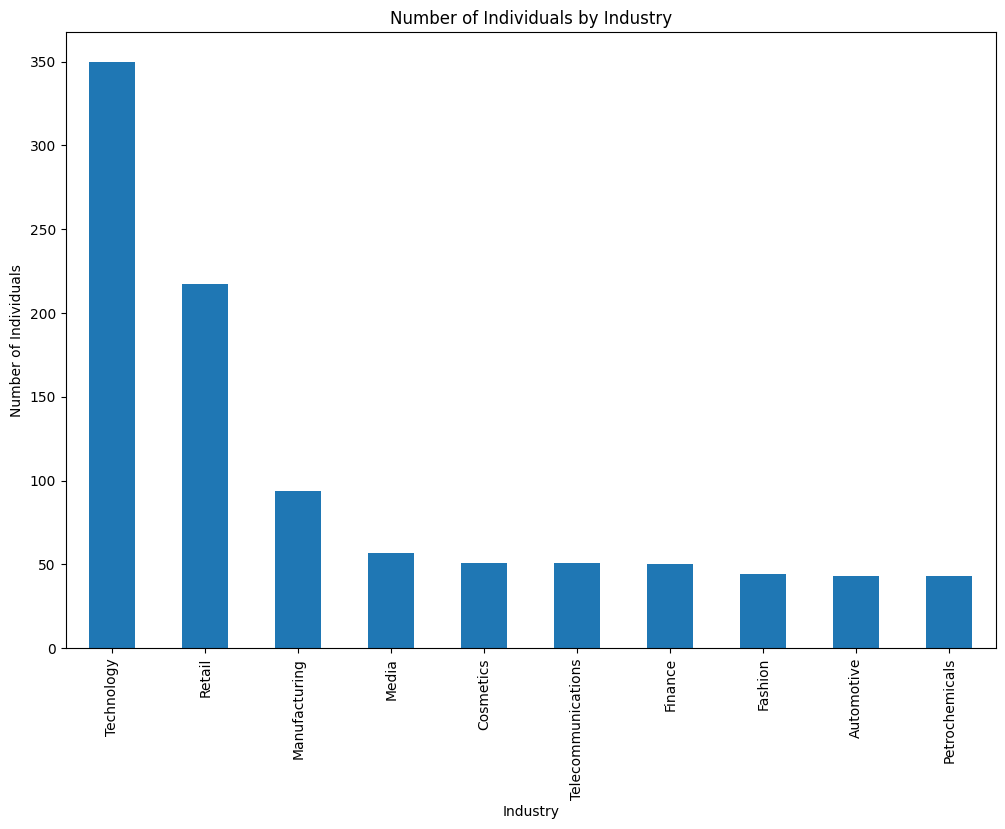

In [6]:
industry_count = df['Industry'].value_counts()
plt.figure(figsize=(12, 8))
industry_count.plot(kind='bar')
plt.xlabel('Industry')
plt.ylabel('Number of Individuals')
plt.title('Number of Individuals by Industry')
plt.show()


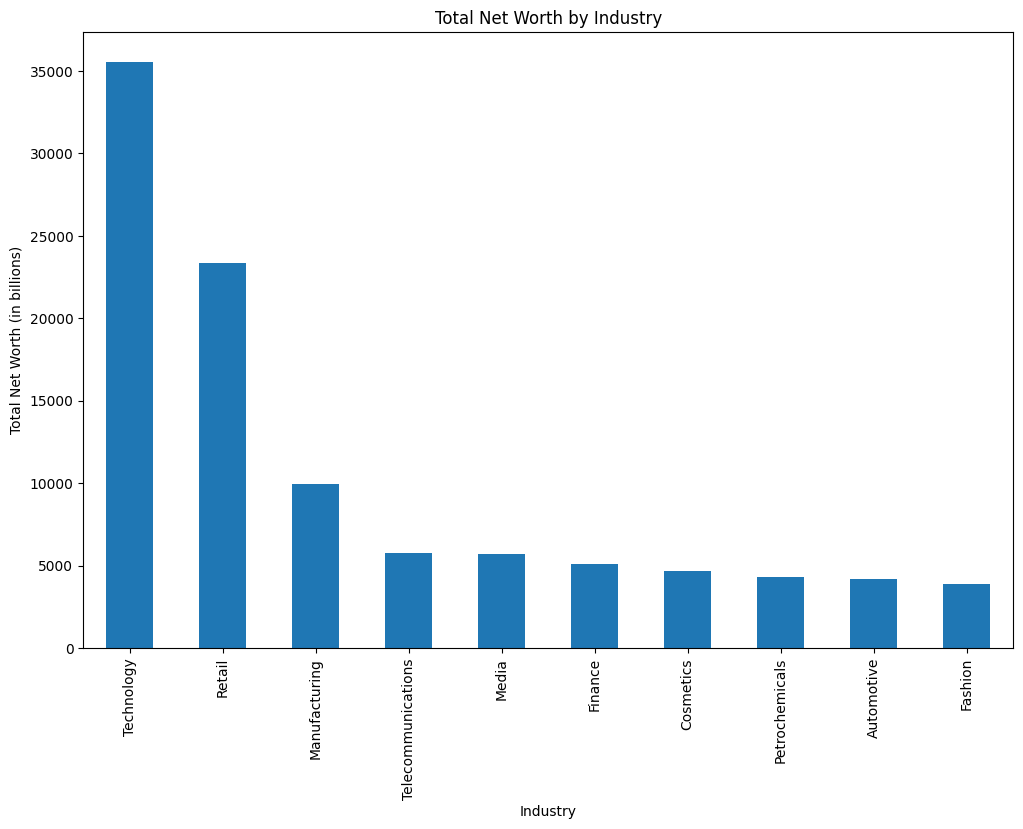

In [7]:
total_net_worth_by_industry = df.groupby('Industry')['Net Worth (in billions)'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
total_net_worth_by_industry.plot(kind='bar')
plt.xlabel('Industry')
plt.ylabel('Total Net Worth (in billions)')
plt.title('Total Net Worth by Industry')
plt.show()


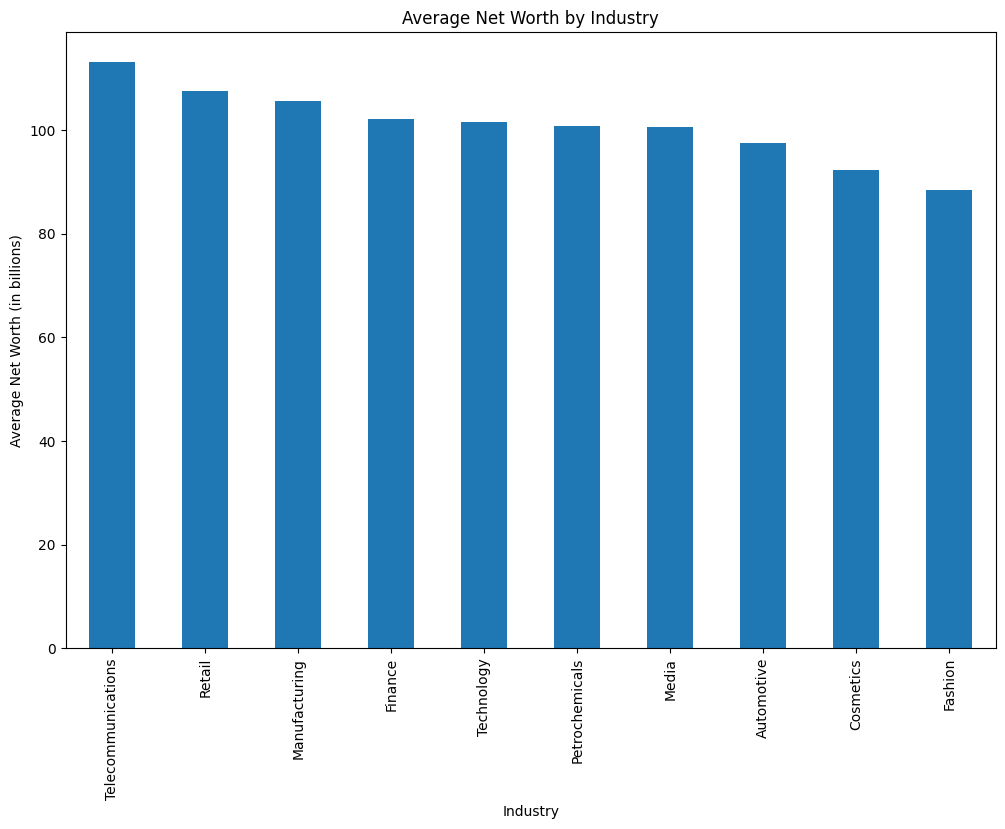

In [8]:
avg_net_worth_by_industry = df.groupby('Industry')['Net Worth (in billions)'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
avg_net_worth_by_industry.plot(kind='bar')
plt.xlabel('Industry')
plt.ylabel('Average Net Worth (in billions)')
plt.title('Average Net Worth by Industry')
plt.show()



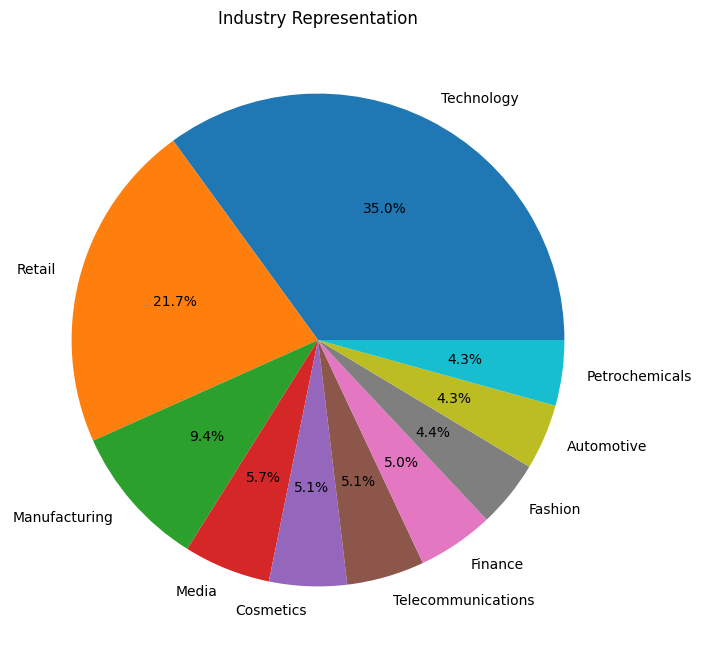

In [9]:
plt.figure(figsize=(12, 8))
industry_count.plot(kind='pie', autopct='%1.1f%%')
plt.title('Industry Representation')
plt.ylabel('')
plt.show()


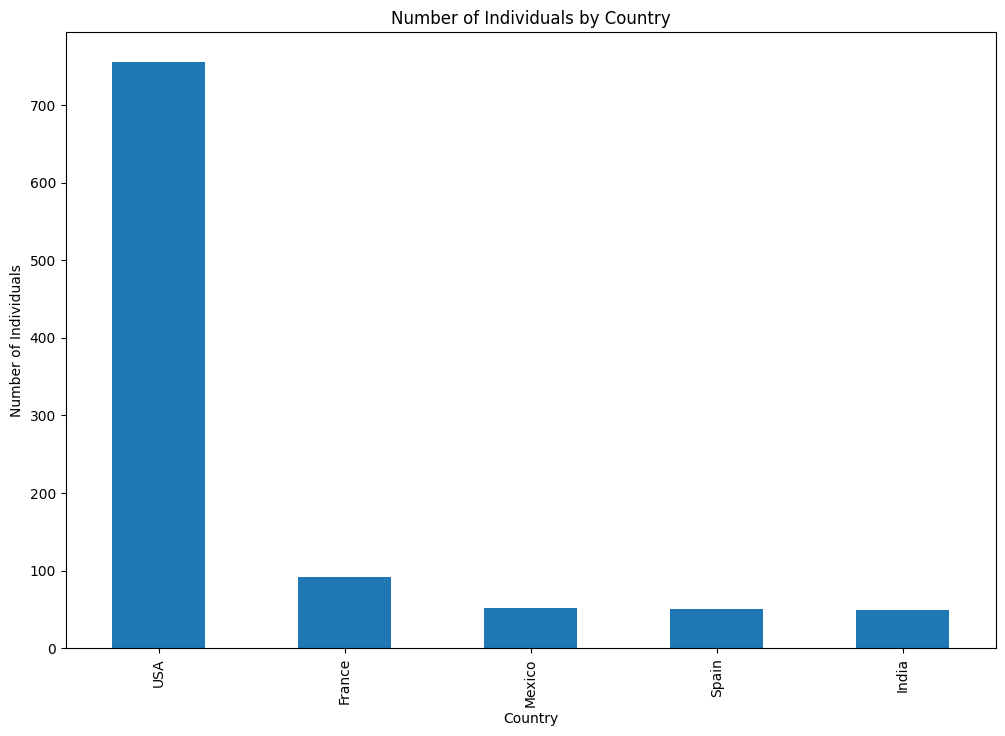

In [10]:
country_count = df['Country'].value_counts()
plt.figure(figsize=(12, 8))
country_count.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Number of Individuals')
plt.title('Number of Individuals by Country')
plt.show()


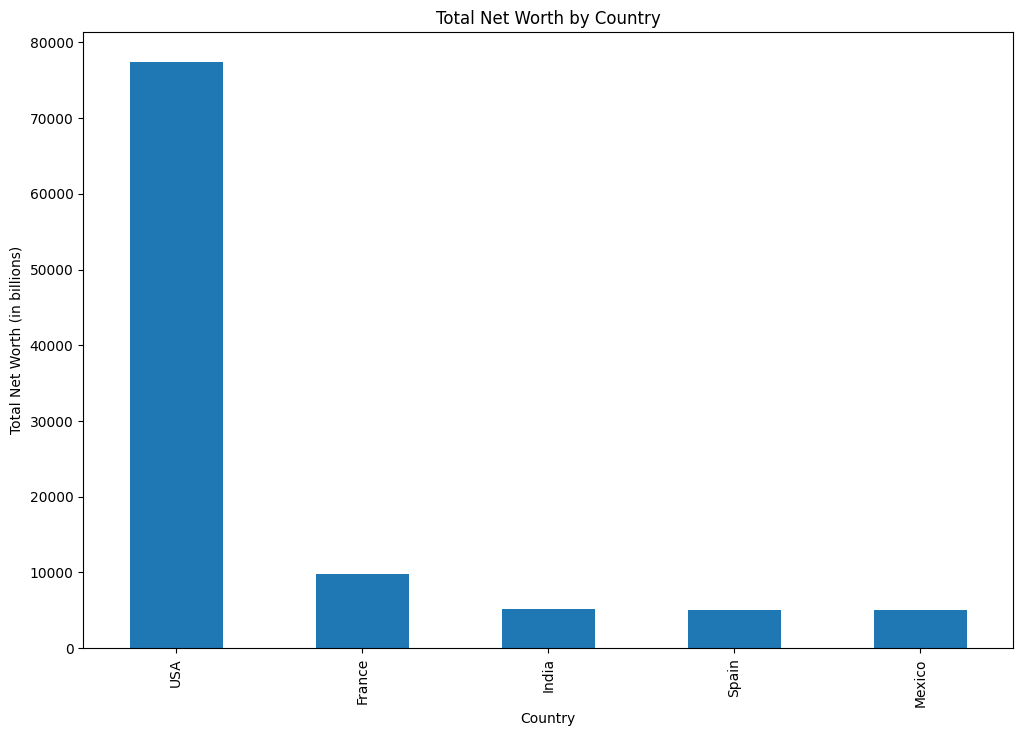

In [11]:
total_net_worth_by_country = df.groupby('Country')['Net Worth (in billions)'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
total_net_worth_by_country.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Total Net Worth (in billions)')
plt.title('Total Net Worth by Country')
plt.show()


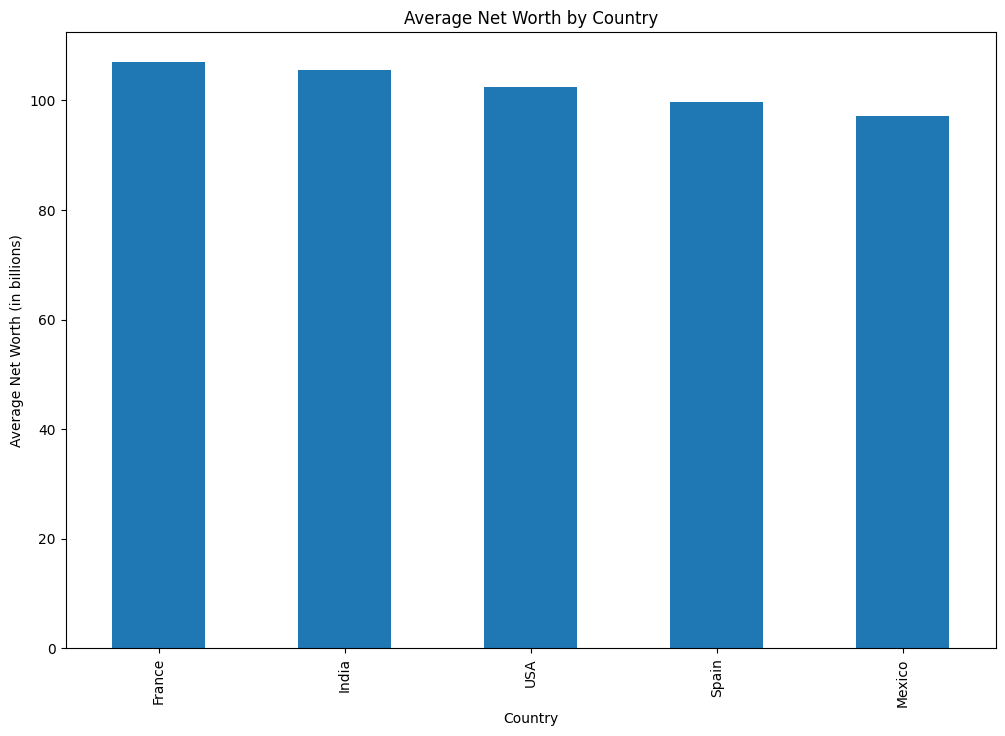

In [12]:
avg_net_worth_by_country = df.groupby('Country')['Net Worth (in billions)'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
avg_net_worth_by_country.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Average Net Worth (in billions)')
plt.title('Average Net Worth by Country')
plt.show()


<Figure size 1200x800 with 0 Axes>

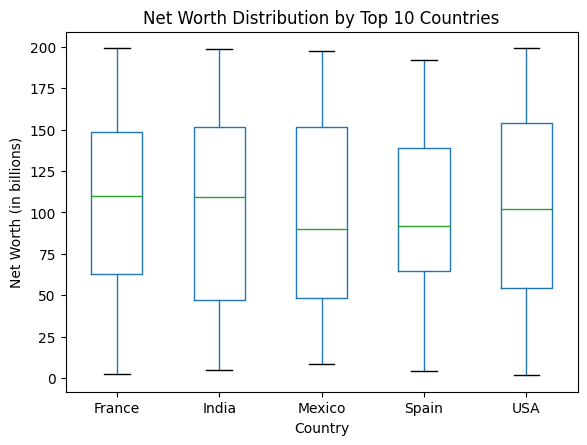

In [13]:
top_countries = df['Country'].value_counts().head(10).index
plt.figure(figsize=(12, 8))
df[df['Country'].isin(top_countries)].boxplot(by='Country', column='Net Worth (in billions)', grid=False)
plt.title('Net Worth Distribution by Top 10 Countries')
plt.suptitle('')
plt.xlabel('Country')
plt.ylabel('Net Worth (in billions)')
plt.show()


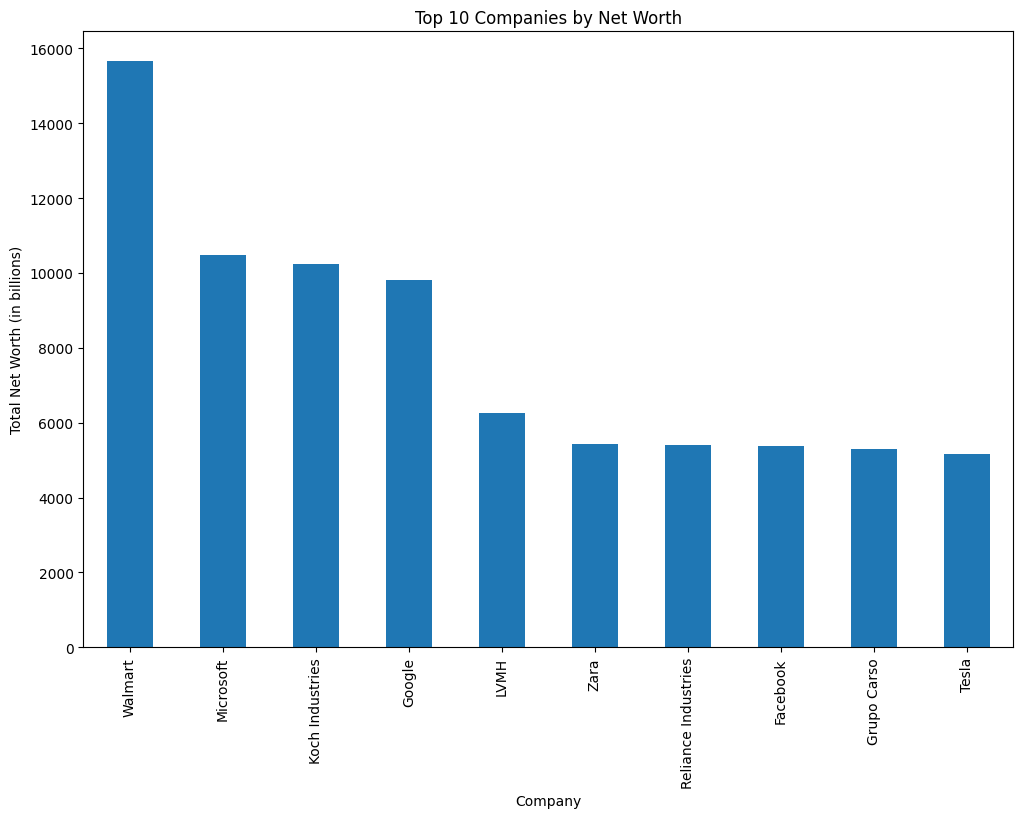

In [14]:
top_companies_by_net_worth = df.groupby('Company')['Net Worth (in billions)'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 8))
top_companies_by_net_worth.plot(kind='bar')
plt.xlabel('Company')
plt.ylabel('Total Net Worth (in billions)')
plt.title('Top 10 Companies by Net Worth')
plt.show()


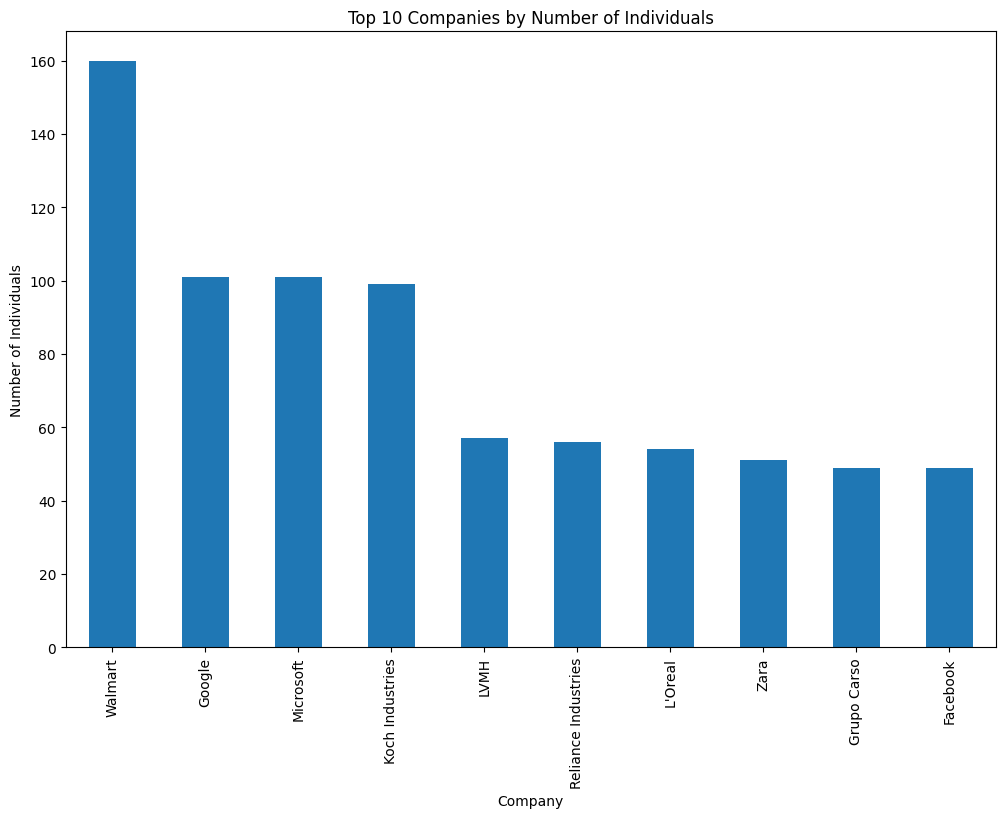

In [15]:
company_count = df['Company'].value_counts().head(10)
plt.figure(figsize=(12, 8))
company_count.plot(kind='bar')
plt.xlabel('Company')
plt.ylabel('Number of Individuals')
plt.title('Top 10 Companies by Number of Individuals')
plt.show()


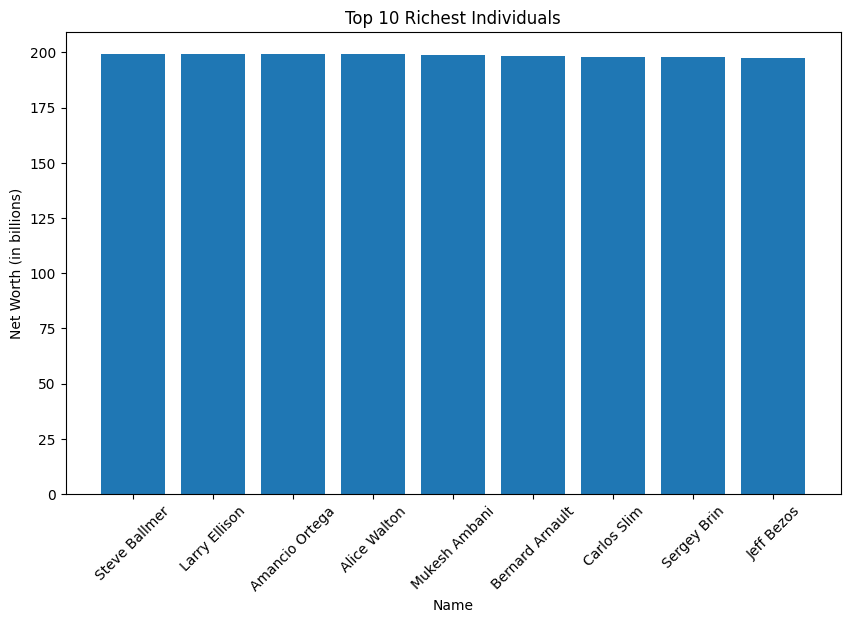

In [16]:
top_10_richest = df.sort_values(by='Net Worth (in billions)', ascending=False).head(10)
plt.figure(figsize=(10, 6))
plt.bar(top_10_richest['Name'], top_10_richest['Net Worth (in billions)'])
plt.xlabel('Name')
plt.ylabel('Net Worth (in billions)')
plt.title('Top 10 Richest Individuals')
plt.xticks(rotation=45)
plt.show()


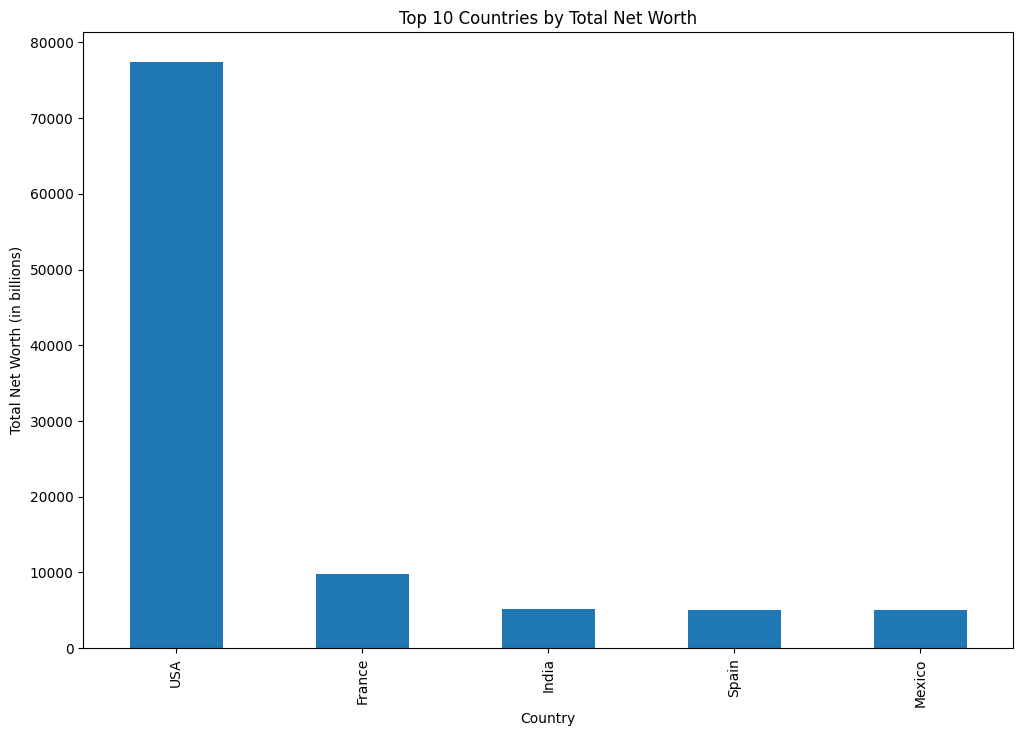

In [17]:
top_10_countries_by_net_worth = total_net_worth_by_country.head(10)
plt.figure(figsize=(12, 8))
top_10_countries_by_net_worth.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Total Net Worth (in billions)')
plt.title('Top 10 Countries by Total Net Worth')
plt.show()


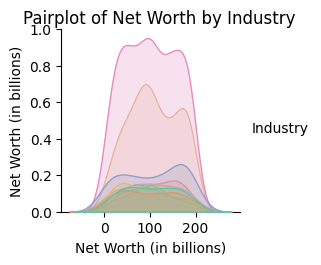

In [18]:
sns.pairplot(df, hue='Industry', palette='Set2')
plt.suptitle('Pairplot of Net Worth by Industry', y=1.02)
plt.show()

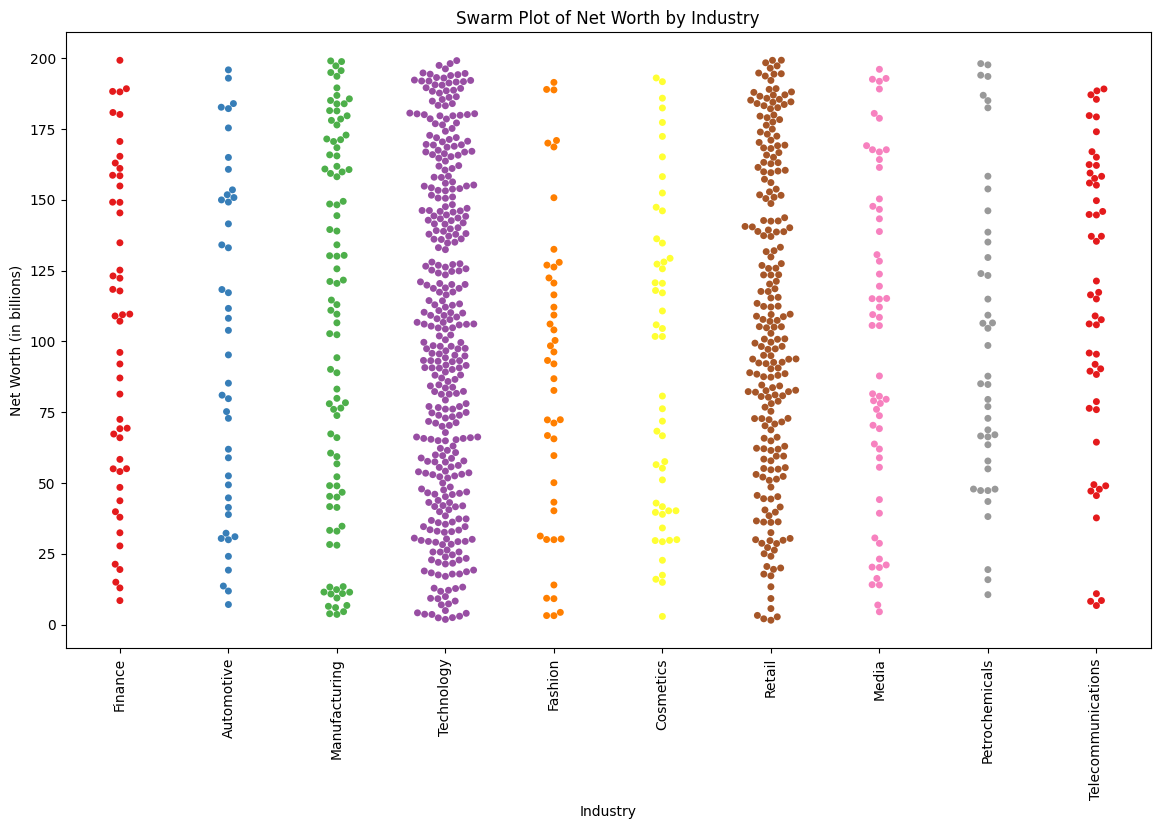

In [19]:
plt.figure(figsize=(14, 8))
sns.swarmplot(x='Industry', y='Net Worth (in billions)', data=df, palette='Set1')
plt.xticks(rotation=90)
plt.title('Swarm Plot of Net Worth by Industry')
plt.show()


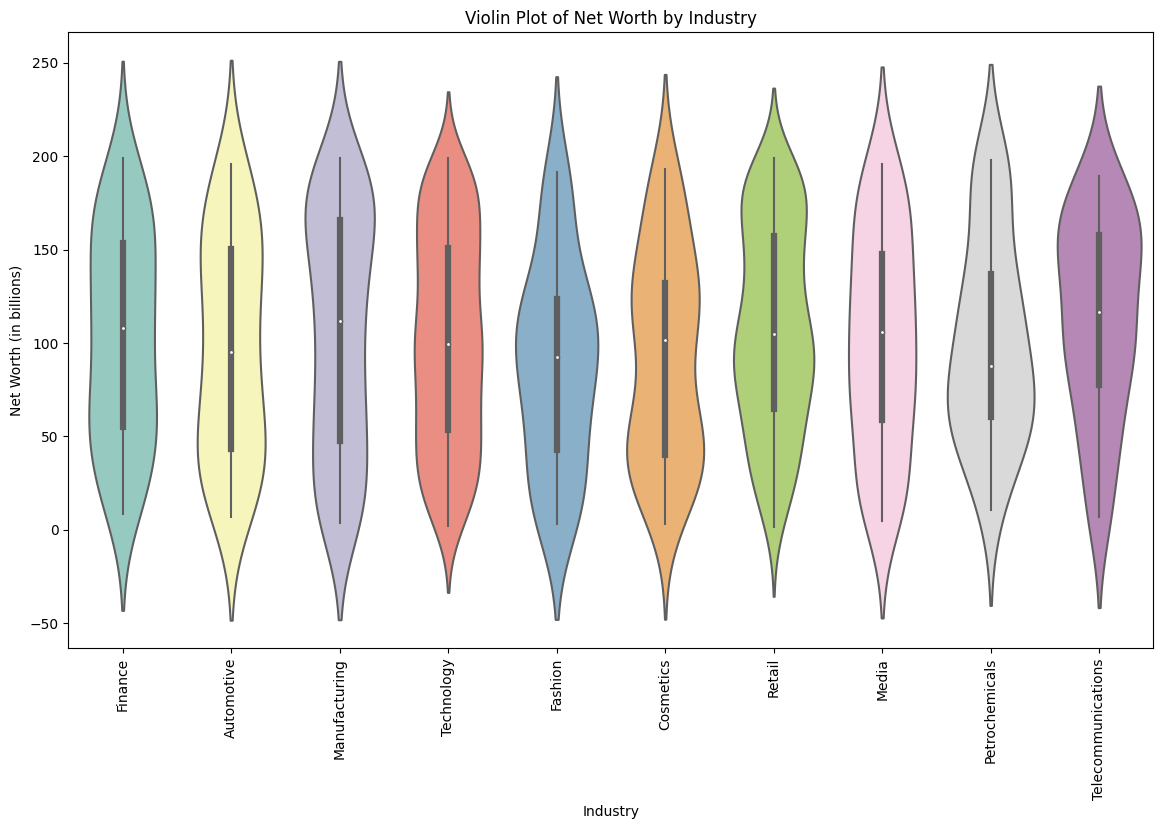

In [20]:
plt.figure(figsize=(14, 8))
sns.violinplot(x='Industry', y='Net Worth (in billions)', data=df, palette='Set3')
plt.xticks(rotation=90)
plt.title('Violin Plot of Net Worth by Industry')
plt.show()


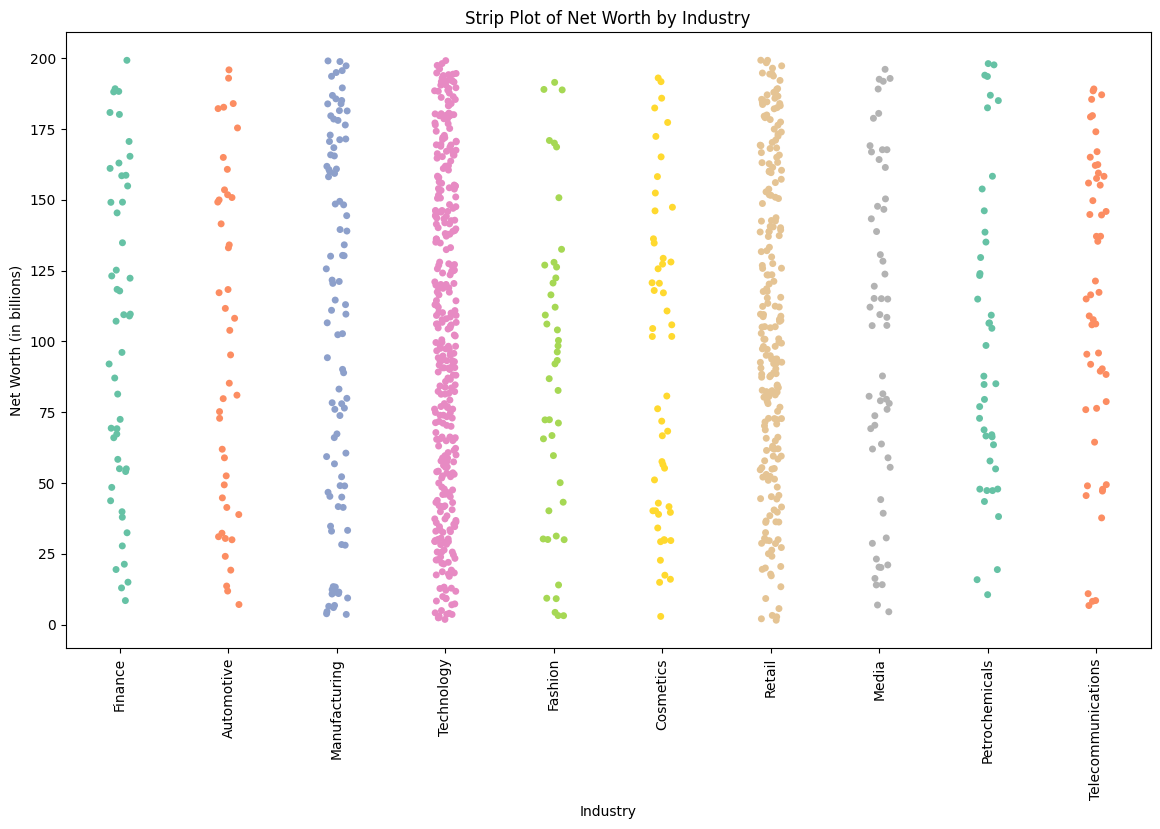

In [21]:
plt.figure(figsize=(14, 8))
sns.stripplot(x='Industry', y='Net Worth (in billions)', data=df, palette='Set2')
plt.xticks(rotation=90)
plt.title('Strip Plot of Net Worth by Industry')
plt.show()


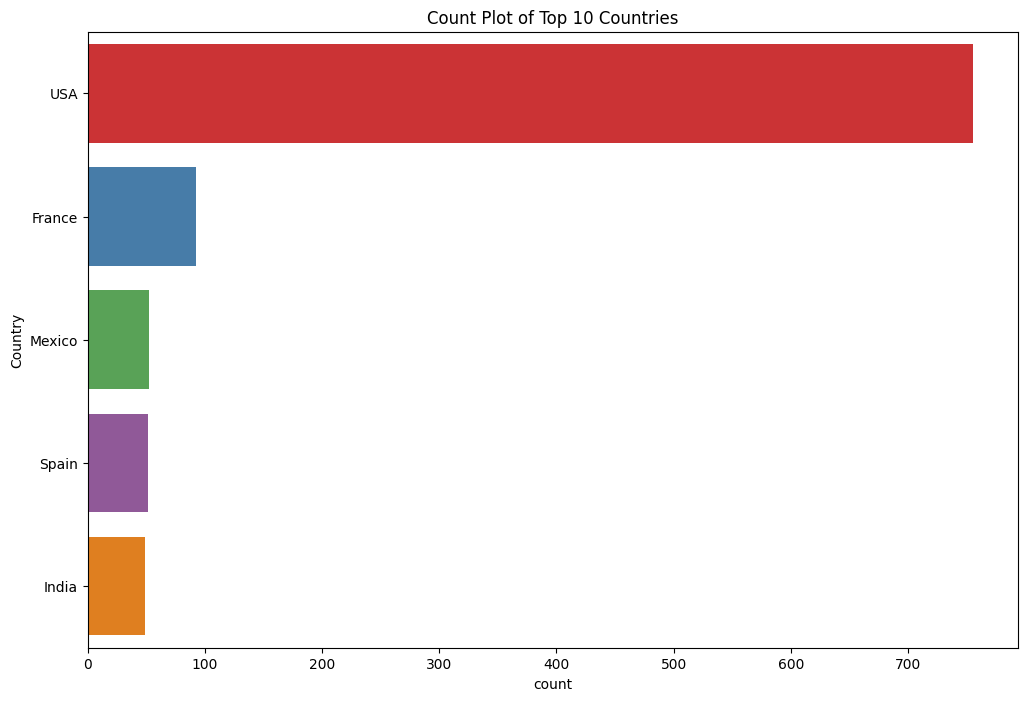

In [22]:
top_10_countries = df['Country'].value_counts().head(10)
plt.figure(figsize=(12, 8))
sns.countplot(y='Country', data=df[df['Country'].isin(top_10_countries.index)], palette='Set1', order=top_10_countries.index)
plt.title('Count Plot of Top 10 Countries')
plt.show()


In [23]:
import plotly.express as px

fig = px.sunburst(df, path=['Industry', 'Country'], values='Net Worth (in billions)', 
                  color='Net Worth (in billions)', 
                  color_continuous_scale='RdYlBu', 
                  title='Sunburst Plot of Industry and Country Distribution')
fig.show()


In [24]:
fig = px.treemap(df, path=['Industry', 'Country'], values='Net Worth (in billions)', 
                 color='Net Worth (in billions)', 
                 color_continuous_scale='Viridis', 
                 title='Treemap of Net Worth by Industry and Country')
fig.show()


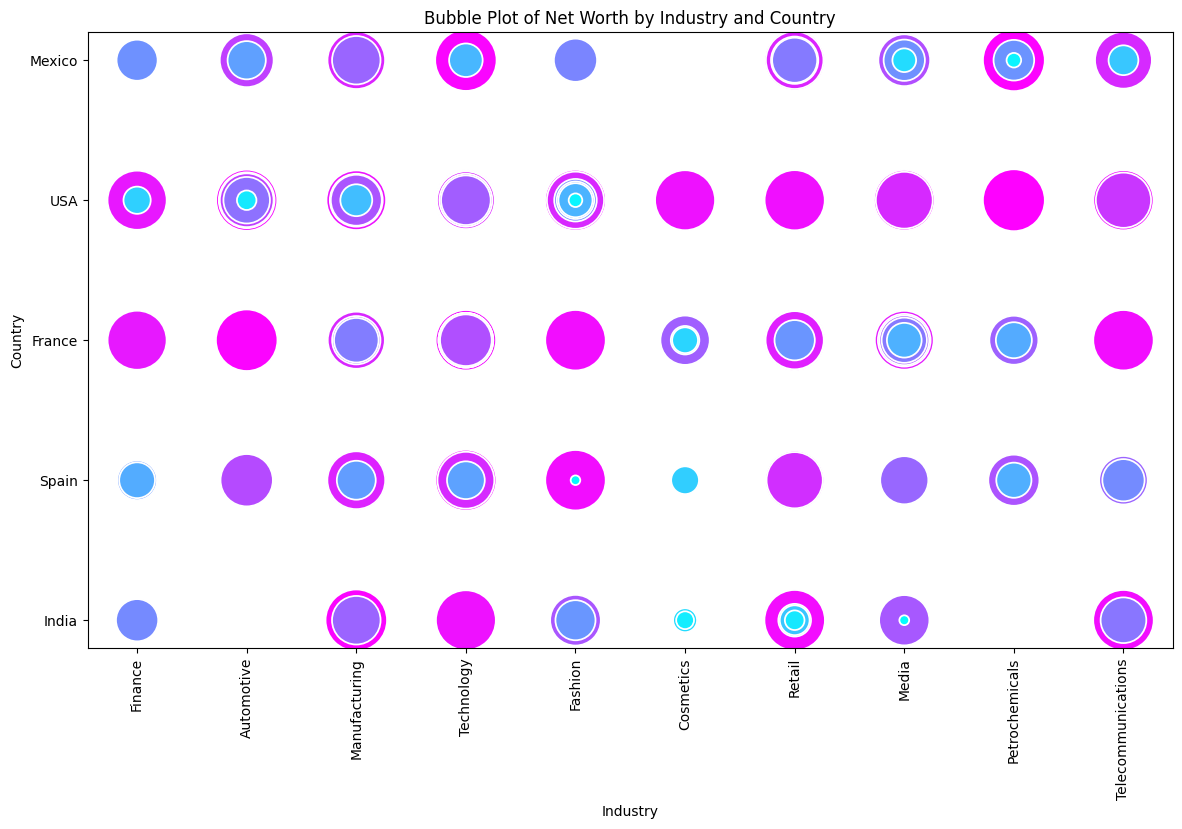

In [25]:
plt.figure(figsize=(14, 8))
sns.scatterplot(x='Industry', y='Country', size='Net Worth (in billions)', hue='Net Worth (in billions)', 
                data=df, palette='cool', sizes=(20, 2000), legend=False)
plt.xticks(rotation=90)
plt.title('Bubble Plot of Net Worth by Industry and Country')
plt.show()


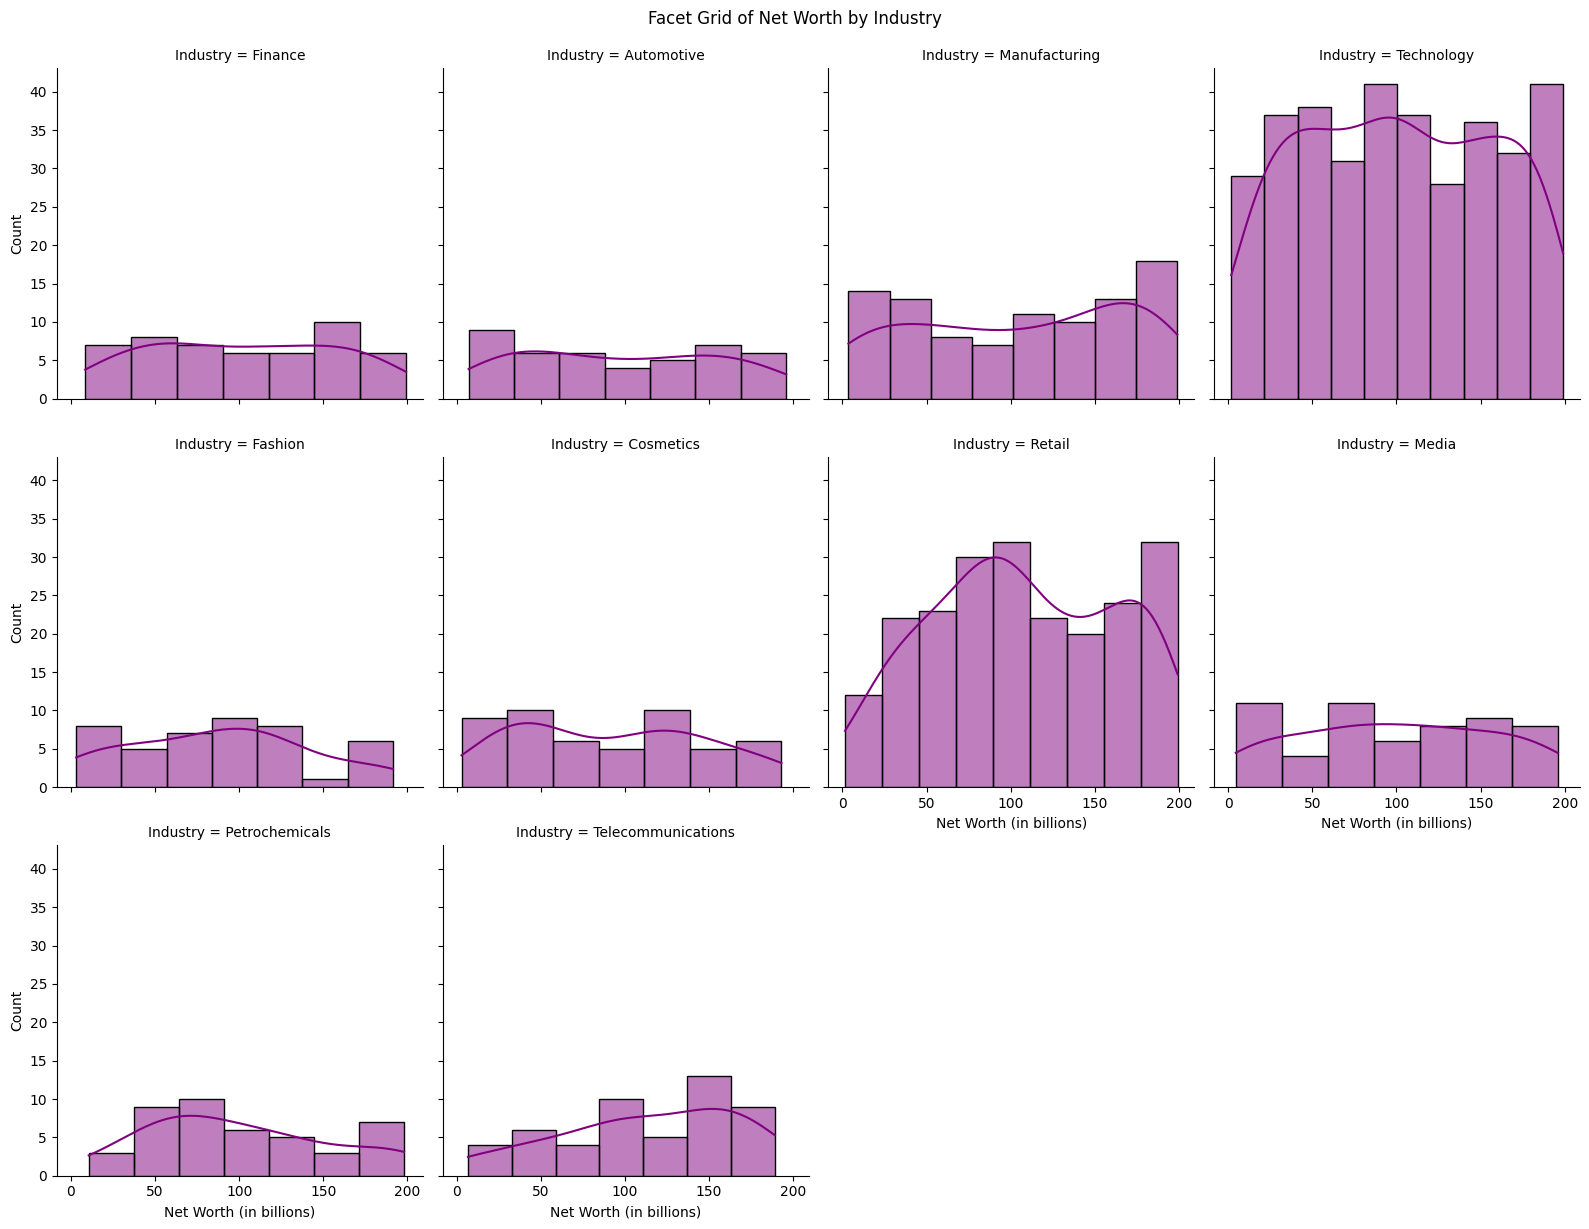

In [26]:
g = sns.FacetGrid(df, col='Industry', col_wrap=4, height=4, aspect=1)
g.map(sns.histplot, 'Net Worth (in billions)', kde=True, color='purple')
g.fig.suptitle('Facet Grid of Net Worth by Industry', y=1.02)
plt.show()


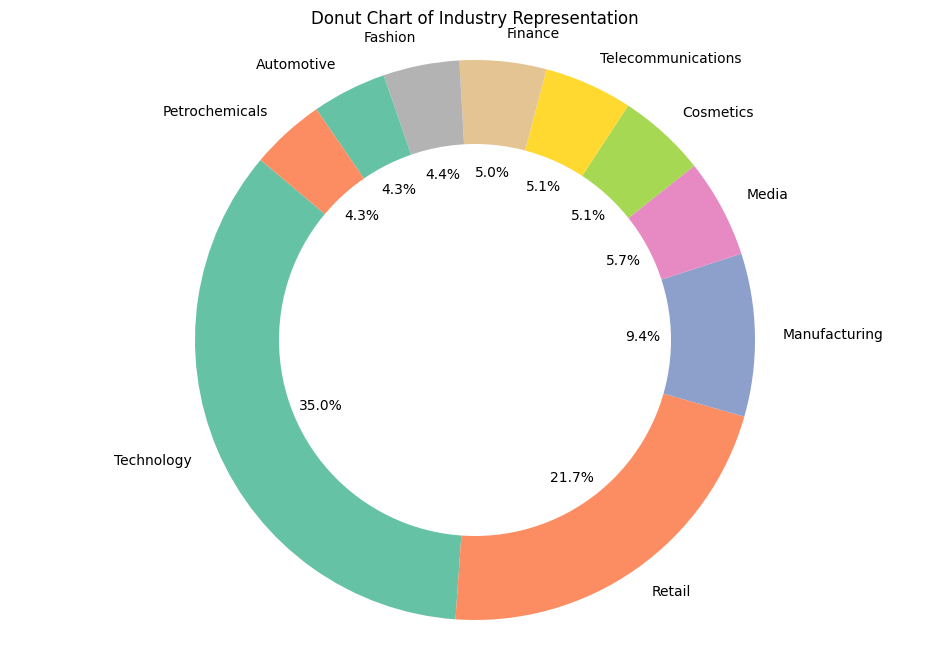

In [27]:
industry_count = df['Industry'].value_counts()
plt.figure(figsize=(12, 8))
plt.pie(industry_count, labels=industry_count.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set2'))
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Donut Chart of Industry Representation')
plt.axis('equal')
plt.show()


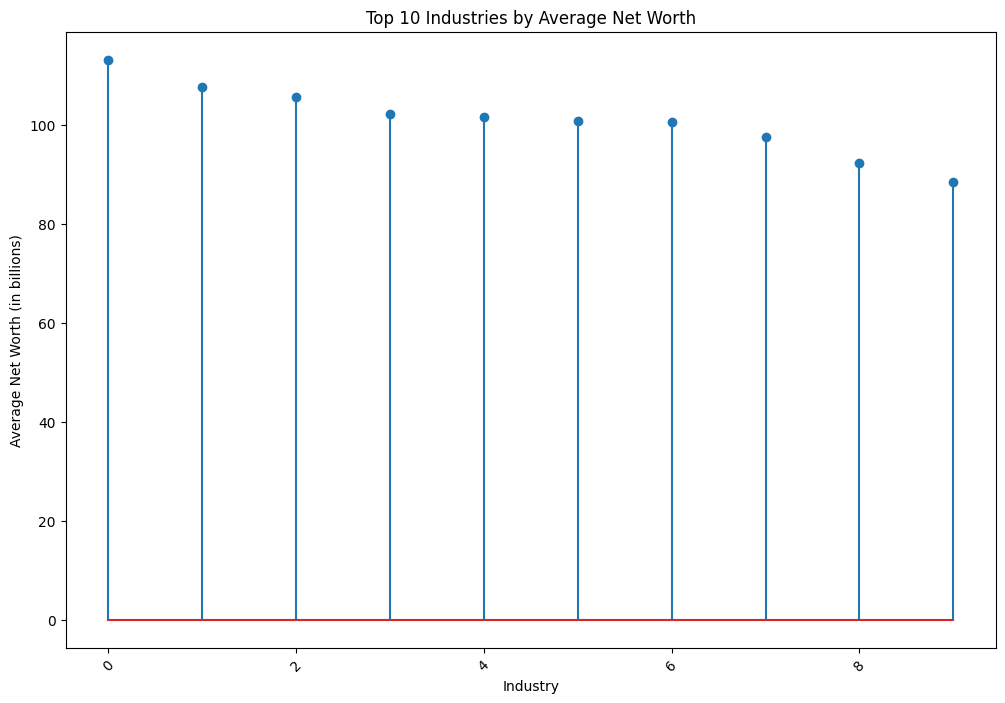

In [28]:
avg_net_worth_by_industry = df.groupby('Industry')['Net Worth (in billions)'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 8))
plt.stem(avg_net_worth_by_industry, use_line_collection=True)
plt.xlabel('Industry')
plt.ylabel('Average Net Worth (in billions)')
plt.title('Top 10 Industries by Average Net Worth')
plt.xticks(rotation=45)
plt.show()
